In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K
from keras.utils import np_utils

from matplotlib import pyplot as plt
from prettytable import PrettyTable

Using TensorFlow backend.


In [0]:
def plot_loss(x, vy, ty, xlabel='Epoch', ylabel='Categorical Crossentropy Loss'):
    _, = plt.plot(x, vy, 'b', label="Validation Loss")
    _, = plt.plot(x, ty, 'r', label="Train Loss")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.legend()
    plt.grid()
    plt.show()

In [0]:
pt = PrettyTable()
pt.field_names = ['CNN Architecture', 'Mean Train Accuracy', 'Mean Validation Accuracy', 'Test Accuracy']

In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

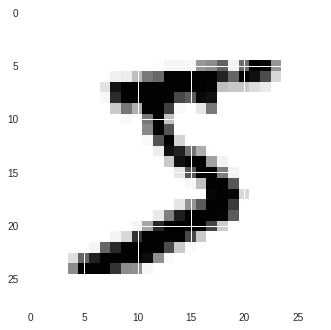

In [5]:
plt.imshow(x_train[0])

In [6]:
# Check for Theano vs Tensorflow Backend
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Train on 18000 samples, validate on 42000 samples
Epoch 1/12
18000/18000 [==============================] - 6s 337us/step - loss: 0.5104 - acc: 0.8462 - val_loss: 0.1122 - val_acc: 0.9662
Epoch 2/12
18000/18000 [==============================] - 4s 228us/step - loss: 0.1669 - acc: 0.9502 - val_loss: 0.0766 - val_acc: 0.9772
Epoch 3/12
18000/18000 [==============================] - 4s 229us/step - loss: 0.1102 - acc: 0.9663 - val_loss: 0.0682 - val_acc: 0.9787
Epoch 4/12
18000/18000 [==============================] - 4s 230us/step - loss: 0.0854 - acc: 0.9728 - val_loss: 0.0637 - val_acc: 0.9814
Epoch 5/12
18000/18000 [==============================] - 4s 230us/step - loss: 0.0690 - acc: 0.9793 - val_loss: 0.0580 - val_acc: 0.9826
Epoch 6/12
18000/18000 [==============================] - 4s 229us/step - loss: 0.0563 - acc: 0.9818 - val_loss: 0.0526 - val_acc: 0.9845
Epoch 7/12
18000/18000 [==============================] - 4s 230us/step - loss: 0.0529 - acc: 0.9822 - val_loss: 0.0536 - 

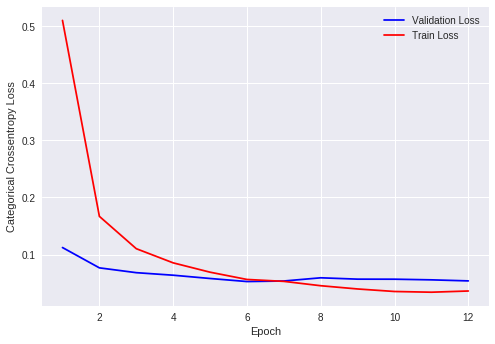

CPU times: user 41.5 s, sys: 9.24 s, total: 50.7 s
Wall time: 53.4 s


In [7]:
%%time
def get_cnn():
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid', \
                     activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
    
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    
    return model

model = get_cnn()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.7)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x = list(range(1, epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)

pt.add_row(['2-Conv+Dropout+Kernel(3x3)', sum(history.history['acc'])/len(history.history['acc']), \
            sum(history.history['val_acc'])/len(history.history['val_acc']), score[1]])

Train on 18000 samples, validate on 42000 samples
Epoch 1/12
18000/18000 [==============================] - 4s 238us/step - loss: 0.3027 - acc: 0.9089 - val_loss: 0.1015 - val_acc: 0.9695
Epoch 2/12
18000/18000 [==============================] - 4s 219us/step - loss: 0.0659 - acc: 0.9808 - val_loss: 0.0771 - val_acc: 0.9761
Epoch 3/12
18000/18000 [==============================] - 4s 218us/step - loss: 0.0323 - acc: 0.9896 - val_loss: 0.0759 - val_acc: 0.9773
Epoch 4/12
18000/18000 [==============================] - 4s 218us/step - loss: 0.0196 - acc: 0.9938 - val_loss: 0.0804 - val_acc: 0.9777
Epoch 5/12
18000/18000 [==============================] - 4s 222us/step - loss: 0.0100 - acc: 0.9972 - val_loss: 0.0751 - val_acc: 0.9792
Epoch 6/12
18000/18000 [==============================] - 4s 230us/step - loss: 0.0071 - acc: 0.9984 - val_loss: 0.0784 - val_acc: 0.9809
Epoch 7/12
18000/18000 [==============================] - 4s 218us/step - loss: 0.0031 - acc: 0.9989 - val_loss: 0.0771 - 

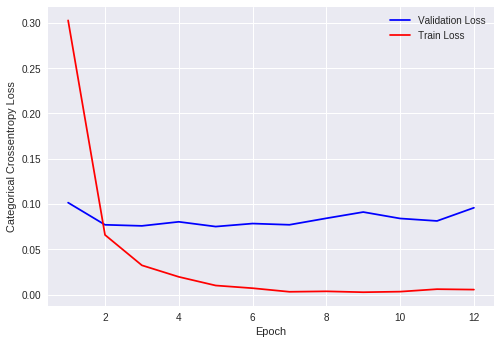

CPU times: user 38.6 s, sys: 8.37 s, total: 46.9 s
Wall time: 49.4 s


In [8]:
%%time
def get_cnn():
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid', \
                     activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
    
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    
    return model

model = get_cnn()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.7)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x = list(range(1, epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)

pt.add_row(['2-Conv+Kernel(3x3)', sum(history.history['acc'])/len(history.history['acc']), \
            sum(history.history['val_acc'])/len(history.history['val_acc']), score[1]])

Train on 18000 samples, validate on 42000 samples
Epoch 1/12
18000/18000 [==============================] - 5s 259us/step - loss: 0.4113 - acc: 0.8718 - val_loss: 0.1139 - val_acc: 0.9656
Epoch 2/12
18000/18000 [==============================] - 4s 230us/step - loss: 0.1434 - acc: 0.9577 - val_loss: 0.0803 - val_acc: 0.9760
Epoch 3/12
18000/18000 [==============================] - 4s 229us/step - loss: 0.0992 - acc: 0.9686 - val_loss: 0.0695 - val_acc: 0.9794
Epoch 4/12
18000/18000 [==============================] - 4s 229us/step - loss: 0.0733 - acc: 0.9761 - val_loss: 0.0670 - val_acc: 0.9802
Epoch 5/12
18000/18000 [==============================] - 4s 229us/step - loss: 0.0580 - acc: 0.9821 - val_loss: 0.0667 - val_acc: 0.9808
Epoch 6/12
18000/18000 [==============================] - 4s 229us/step - loss: 0.0510 - acc: 0.9826 - val_loss: 0.0666 - val_acc: 0.9806
Epoch 7/12
18000/18000 [==============================] - 4s 228us/step - loss: 0.0445 - acc: 0.9838 - val_loss: 0.0692 - 

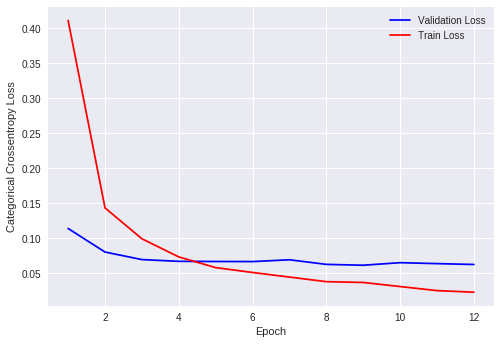

CPU times: user 38.9 s, sys: 9.18 s, total: 48.1 s
Wall time: 51.8 s


In [9]:
%%time
def get_cnn():
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), padding='valid', \
                     activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
    
    model.add(Conv2D(64, (2, 2), activation='relu', kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    
    return model

model = get_cnn()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.7)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x = list(range(1, epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)

pt.add_row(['2-Conv+Dropout+Kernel(2x2)', sum(history.history['acc'])/len(history.history['acc']), \
            sum(history.history['val_acc'])/len(history.history['val_acc']), score[1]])

Train on 18000 samples, validate on 42000 samples
Epoch 1/12
18000/18000 [==============================] - 3s 157us/step - loss: 0.6812 - acc: 0.7836 - val_loss: 0.1518 - val_acc: 0.9549
Epoch 2/12
18000/18000 [==============================] - 2s 138us/step - loss: 0.1973 - acc: 0.9416 - val_loss: 0.0965 - val_acc: 0.9695
Epoch 3/12
18000/18000 [==============================] - 3s 141us/step - loss: 0.1364 - acc: 0.9611 - val_loss: 0.0757 - val_acc: 0.9760
Epoch 4/12
18000/18000 [==============================] - 3s 144us/step - loss: 0.1050 - acc: 0.9688 - val_loss: 0.0667 - val_acc: 0.9795
Epoch 5/12
18000/18000 [==============================] - 3s 143us/step - loss: 0.0840 - acc: 0.9745 - val_loss: 0.0562 - val_acc: 0.9830
Epoch 6/12
18000/18000 [==============================] - 3s 144us/step - loss: 0.0726 - acc: 0.9783 - val_loss: 0.0577 - val_acc: 0.9830
Epoch 7/12
18000/18000 [==============================] - 3s 142us/step - loss: 0.0649 - acc: 0.9801 - val_loss: 0.0557 - 

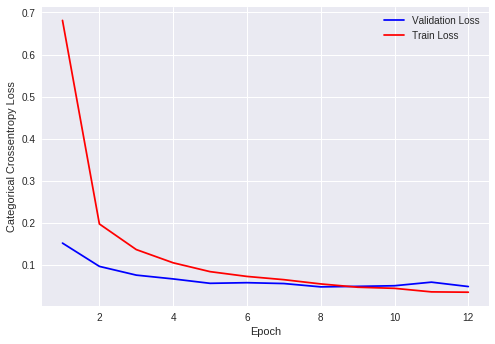

CPU times: user 34.4 s, sys: 5.83 s, total: 40.3 s
Wall time: 33.7 s


In [10]:
%%time
def get_cnn():
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(5, 5), strides=(2, 2), padding='valid', \
                     activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
    
    model.add(Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    
    return model

model = get_cnn()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.7)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x = list(range(1, epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)

pt.add_row(['2-Conv+Dropout+Kernel(5x5)+Stride(2x2)+Dense(128)', sum(history.history['acc'])/len(history.history['acc']), \
            sum(history.history['val_acc'])/len(history.history['val_acc']), score[1]])

Train on 18000 samples, validate on 42000 samples
Epoch 1/12
18000/18000 [==============================] - 3s 171us/step - loss: 0.5352 - acc: 0.8303 - val_loss: 0.1178 - val_acc: 0.9664
Epoch 2/12
18000/18000 [==============================] - 3s 143us/step - loss: 0.1483 - acc: 0.9543 - val_loss: 0.0862 - val_acc: 0.9728
Epoch 3/12
18000/18000 [==============================] - 3s 142us/step - loss: 0.1032 - acc: 0.9679 - val_loss: 0.0619 - val_acc: 0.9804
Epoch 4/12
18000/18000 [==============================] - 3s 143us/step - loss: 0.0727 - acc: 0.9780 - val_loss: 0.0621 - val_acc: 0.9798
Epoch 5/12
18000/18000 [==============================] - 3s 143us/step - loss: 0.0619 - acc: 0.9808 - val_loss: 0.0532 - val_acc: 0.9838
Epoch 6/12
18000/18000 [==============================] - 3s 146us/step - loss: 0.0457 - acc: 0.9857 - val_loss: 0.0522 - val_acc: 0.9843
Epoch 7/12
18000/18000 [==============================] - 3s 144us/step - loss: 0.0420 - acc: 0.9862 - val_loss: 0.0482 - 

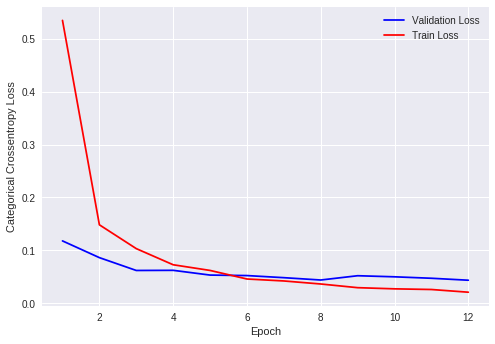

CPU times: user 33.3 s, sys: 5.6 s, total: 38.9 s
Wall time: 33.1 s


In [11]:
%%time
def get_cnn():
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(5, 5), strides=(2, 2), padding='valid', \
                     activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
    
    model.add(Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    
    return model

model = get_cnn()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.7)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x = list(range(1, epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)

pt.add_row(['2-Conv+Dropout+Kernel(5x5)+Stride(2x2)+Dense(256)', sum(history.history['acc'])/len(history.history['acc']), \
            sum(history.history['val_acc'])/len(history.history['val_acc']), score[1]])

Train on 18000 samples, validate on 42000 samples
Epoch 1/20
18000/18000 [==============================] - 5s 281us/step - loss: 0.7778 - acc: 0.7494 - val_loss: 0.1374 - val_acc: 0.9581
Epoch 2/20
18000/18000 [==============================] - 4s 221us/step - loss: 0.1939 - acc: 0.9412 - val_loss: 0.1104 - val_acc: 0.9658
Epoch 3/20
18000/18000 [==============================] - 4s 223us/step - loss: 0.1343 - acc: 0.9597 - val_loss: 0.0648 - val_acc: 0.9791
Epoch 4/20
18000/18000 [==============================] - 4s 222us/step - loss: 0.0983 - acc: 0.9711 - val_loss: 0.0670 - val_acc: 0.9806
Epoch 5/20
18000/18000 [==============================] - 4s 221us/step - loss: 0.0792 - acc: 0.9767 - val_loss: 0.0663 - val_acc: 0.9807
Epoch 6/20
18000/18000 [==============================] - 4s 220us/step - loss: 0.0641 - acc: 0.9803 - val_loss: 0.0553 - val_acc: 0.9840
Epoch 7/20
18000/18000 [==============================] - 4s 219us/step - loss: 0.0546 - acc: 0.9824 - val_loss: 0.0544 - 

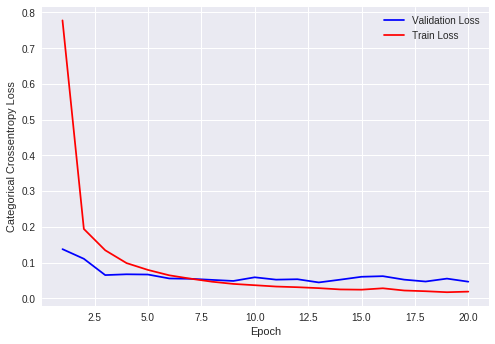

CPU times: user 1min 12s, sys: 14 s, total: 1min 26s
Wall time: 1min 23s


In [12]:
%%time
epochs = 20
def get_cnn():
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(5, 5), strides=(2, 2), padding='same', \
                     activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
    
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    
    return model

model = get_cnn()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.7)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x = list(range(1, epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)

pt.add_row(['3-Conv+BN+Dropout+Kernel(5x5)+Stride(2x2)', sum(history.history['acc'])/len(history.history['acc']), \
            sum(history.history['val_acc'])/len(history.history['val_acc']), score[1]])

Train on 18000 samples, validate on 42000 samples
Epoch 1/12
18000/18000 [==============================] - 9s 509us/step - loss: 0.7721 - acc: 0.7626 - val_loss: 0.1316 - val_acc: 0.9598
Epoch 2/12
18000/18000 [==============================] - 8s 435us/step - loss: 0.2239 - acc: 0.9314 - val_loss: 0.0894 - val_acc: 0.9714
Epoch 3/12
18000/18000 [==============================] - 8s 437us/step - loss: 0.1502 - acc: 0.9537 - val_loss: 0.1346 - val_acc: 0.9584
Epoch 4/12
18000/18000 [==============================] - 8s 436us/step - loss: 0.1117 - acc: 0.9654 - val_loss: 0.0647 - val_acc: 0.9800
Epoch 5/12
18000/18000 [==============================] - 8s 437us/step - loss: 0.0966 - acc: 0.9704 - val_loss: 0.0750 - val_acc: 0.9777
Epoch 6/12
18000/18000 [==============================] - 8s 436us/step - loss: 0.0881 - acc: 0.9738 - val_loss: 0.0483 - val_acc: 0.9852
Epoch 7/12
18000/18000 [==============================] - 8s 436us/step - loss: 0.0745 - acc: 0.9767 - val_loss: 0.0514 - 

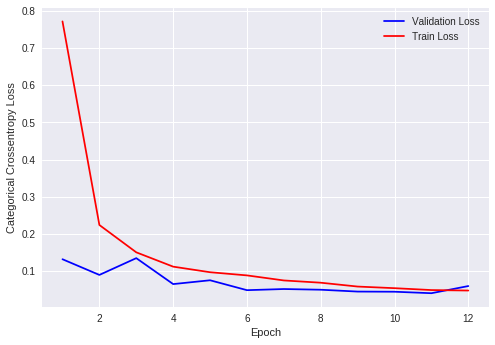

CPU times: user 1min 7s, sys: 15.1 s, total: 1min 22s
Wall time: 1min 38s


In [13]:
%%time
epochs = 12
def get_cnn():
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', \
                     activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
    
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))    
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Conv2D(16, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))    
    model.add(Conv2D(16, (3, 3), activation='relu', padding='valid', kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    
    return model

model = get_cnn()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.7)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x = list(range(1, epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)

pt.add_row(['5-Conv+BN+Dropout+Kernel(3x3)', sum(history.history['acc'])/len(history.history['acc']), \
            sum(history.history['val_acc'])/len(history.history['val_acc']), score[1]])

Train on 18000 samples, validate on 42000 samples
Epoch 1/12
18000/18000 [==============================] - 19s 1ms/step - loss: 0.9229 - acc: 0.7188 - val_loss: 0.2046 - val_acc: 0.9390
Epoch 2/12
18000/18000 [==============================] - 17s 945us/step - loss: 0.2146 - acc: 0.9329 - val_loss: 0.0907 - val_acc: 0.9723
Epoch 3/12
18000/18000 [==============================] - 17s 946us/step - loss: 0.1349 - acc: 0.9586 - val_loss: 0.0920 - val_acc: 0.9718
Epoch 4/12
18000/18000 [==============================] - 17s 946us/step - loss: 0.1016 - acc: 0.9681 - val_loss: 0.0653 - val_acc: 0.9789
Epoch 5/12
18000/18000 [==============================] - 17s 957us/step - loss: 0.0863 - acc: 0.9733 - val_loss: 0.0952 - val_acc: 0.9723
Epoch 6/12
18000/18000 [==============================] - 17s 954us/step - loss: 0.0727 - acc: 0.9774 - val_loss: 0.0507 - val_acc: 0.9838
Epoch 7/12
18000/18000 [==============================] - 17s 947us/step - loss: 0.0627 - acc: 0.9814 - val_loss: 0.05

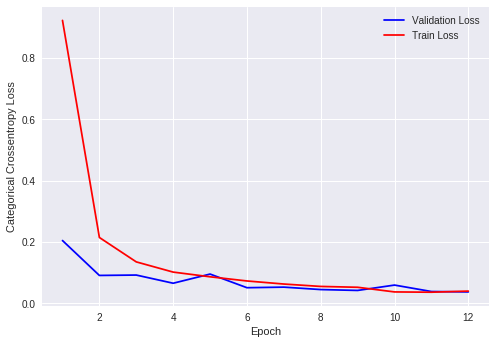

CPU times: user 1min 56s, sys: 33.4 s, total: 2min 29s
Wall time: 3min 32s


In [14]:
%%time
epochs = 12
def get_cnn():
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', \
                     activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
    
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))    
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))    
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
        
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))    
    model.add(Conv2D(32, (3, 3), activation='relu', padding='valid', kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    
    return model

model = get_cnn()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.7)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x = list(range(1, epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)

pt.add_row(['7-Conv+BN+Dropout+Kernel(3x3)', sum(history.history['acc'])/len(history.history['acc']), \
            sum(history.history['val_acc'])/len(history.history['val_acc']), score[1]])

In [15]:
print(pt)

+---------------------------------------------------+---------------------+--------------------------+---------------+
|                  CNN Architecture                 | Mean Train Accuracy | Mean Validation Accuracy | Test Accuracy |
+---------------------------------------------------+---------------------+--------------------------+---------------+
|             2-Conv+Dropout+Kernel(3x3)            |  0.9681203703659551 |    0.9814444444444445    |     0.9871    |
|                 2-Conv+Kernel(3x3)                |  0.9884722222531283 |    0.9788234126984127    |     0.9799    |
|             2-Conv+Dropout+Kernel(2x2)            |  0.9727175926146683 |    0.9801706349206348    |     0.9852    |
| 2-Conv+Dropout+Kernel(5x5)+Stride(2x2)+Dense(128) |  0.9599398148148146 |    0.9796527777777776    |     0.9876    |
| 2-Conv+Dropout+Kernel(5x5)+Stride(2x2)+Dense(256) |  0.9696481481613937 |    0.9817837301587301    |     0.9892    |
|     3-Conv+BN+Dropout+Kernel(5x5)+Stride(2x2) 

# Conclusion :
- Dropout Layer is increasing the performance of the NN. Also, from the Error plots it is observed that Dropout layer is reducing Overfitting in the NN.
- There isn't much evidence to suggest any significant changes in performance with different Kernel Sizes.
- Increasing the Neurons in the Dense Layer (ANN) is improving the performance of the NN.
- A deeper NN (7-Conv CNN) with dropouts and a high number of Neurons in the Dense Layer pushed the Accuracy beyond 99%. 